In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/melbourne-housing-snapshot/melb_data.csv


# 🏡 Predicting House Prices in Melbourne with Regression Modeling

This project showcases a full machine learning pipeline to predict house prices in Melbourne using structured data, feature engineering, and model comparison. The goal: build a high-performing, reproducible workflow with clear documentation and real-world impact.

## 🔍 Workflow Overview

### 1️⃣ Data Audit & Cleaning  
- ✅ Removed duplicates and handled missing values  
- 🔎 Verified data types and feature distributions  
- 📊 Ensured data integrity before modeling  

### 2️⃣ Exploratory Data Analysis (EDA)  
- 📈 Visualized feature distributions and relationships  
- 🧭 Identified outliers, trends, and potential target leakage  
- 🧮 Explored correlations to guide feature selection  

### 3️⃣ Feature Engineering 💡  
- 🏠 Created new features:
  - `TotalRooms` = sum of bedrooms, bathrooms, and living areas  
  - `Density` = rooms per land size  
  - `MonthSold` = extracted from sale date  
- 📊 Validated feature impact using correlation heatmaps and scatter plots  

### 4️⃣ Encoding & Scaling 🔧  
- 🎯 Applied One-Hot Encoding for nominal features  
- 📌 Used Target Encoding for high-cardinality categoricals  
- 📐 Scaled numerical features using `StandardScaler` for model stability  

### 5️⃣ Modeling & Evaluation 🤖  
- 🧪 Trained multiple models:
  - `LinearRegression`  
  - `RandomForestRegressor`  
  - `XGBoostRegressor`  
- 📊 Evaluated using:
  - R² Score  
  - Mean Squared Error (MSE)  
- 🏆 Best performance: **XGBoost** with **R² = 0.86** 🎉  

### 6️⃣ Reproducibility & Organization 🗂️  
- 💾 Saved processed datasets and trained models  
- 🧱 Structured project folders for clarity and reuse  
- 🌍 Documented every step in **Arabic and English** for accessibility  

## 📌 Highlights  
- 🚀 Feature engineering boosted model performance significantly  
- 🧠 XGBoost captured nonlinear relationships and interactions  
- 🛠️ Restart-safe, modular code for future reuse and teaching  
- 🌐 Bilingual documentation to empower learners in both languages  

In [2]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Data Audit & Cleaning

In [3]:
df=pd.read_csv("/kaggle/input/melbourne-housing-snapshot/melb_data.csv")

In [4]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [5]:
df.columns.tolist()

['Suburb',
 'Address',
 'Rooms',
 'Type',
 'Price',
 'Method',
 'SellerG',
 'Date',
 'Distance',
 'Postcode',
 'Bedroom2',
 'Bathroom',
 'Car',
 'Landsize',
 'BuildingArea',
 'YearBuilt',
 'CouncilArea',
 'Lattitude',
 'Longtitude',
 'Regionname',
 'Propertycount']

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [7]:
#convert data types
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['YearBuilt'] = df['YearBuilt'].astype('Int64') 
categorical_cols = ['Suburb', 'Type', 'Method', 'CouncilArea', 'Regionname']
for col in categorical_cols:
    df[col] = df[col].astype('category')

In [8]:
df.dtypes

Suburb                 category
Address                  object
Rooms                     int64
Type                   category
Price                   float64
Method                 category
SellerG                  object
Date             datetime64[ns]
Distance                float64
Postcode                float64
Bedroom2                float64
Bathroom                float64
Car                     float64
Landsize                float64
BuildingArea            float64
YearBuilt                 Int64
CouncilArea            category
Lattitude               float64
Longtitude              float64
Regionname             category
Propertycount           float64
dtype: object

In [9]:
df.isnull().sum().sort_values(ascending=False)

Date             8442
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Car                62
Suburb              0
Bathroom            0
Regionname          0
Longtitude          0
Lattitude           0
Landsize            0
Bedroom2            0
Address             0
Postcode            0
Distance            0
SellerG             0
Method              0
Price               0
Type                0
Rooms               0
Propertycount       0
dtype: int64

In [10]:
#handle missing values
df = df.loc[df['Date'].notnull()].copy()
df['BuildingArea'] = df['BuildingArea'].fillna(df['BuildingArea'].median())
df['YearBuilt'] = df['YearBuilt'].fillna(df['YearBuilt'].median())
df['Age'] = 2025 - df['YearBuilt']
df['CouncilArea'] = df['CouncilArea'].fillna(df['CouncilArea'].mode()[0])

In [11]:
df.isnull().sum().sort_values(ascending=False)

Car              22
Suburb            0
Address           0
Propertycount     0
Regionname        0
Longtitude        0
Lattitude         0
CouncilArea       0
YearBuilt         0
BuildingArea      0
Landsize          0
Bathroom          0
Bedroom2          0
Postcode          0
Distance          0
Date              0
SellerG           0
Method            0
Price             0
Type              0
Rooms             0
Age               0
dtype: int64

In [12]:
df['Car'].value_counts(dropna=False)

Car
2.0    2115
1.0    2076
0.0     409
3.0     291
4.0     172
5.0      26
6.0      22
NaN      22
7.0       3
9.0       1
8.0       1
Name: count, dtype: int64

In [13]:
df['Car'] = df['Car'].fillna(2.0)

In [14]:
df.isnull().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
Age              0
dtype: int64

In [15]:
df.duplicated().sum()

0

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

## Exploratory Data Analysis (EDA)

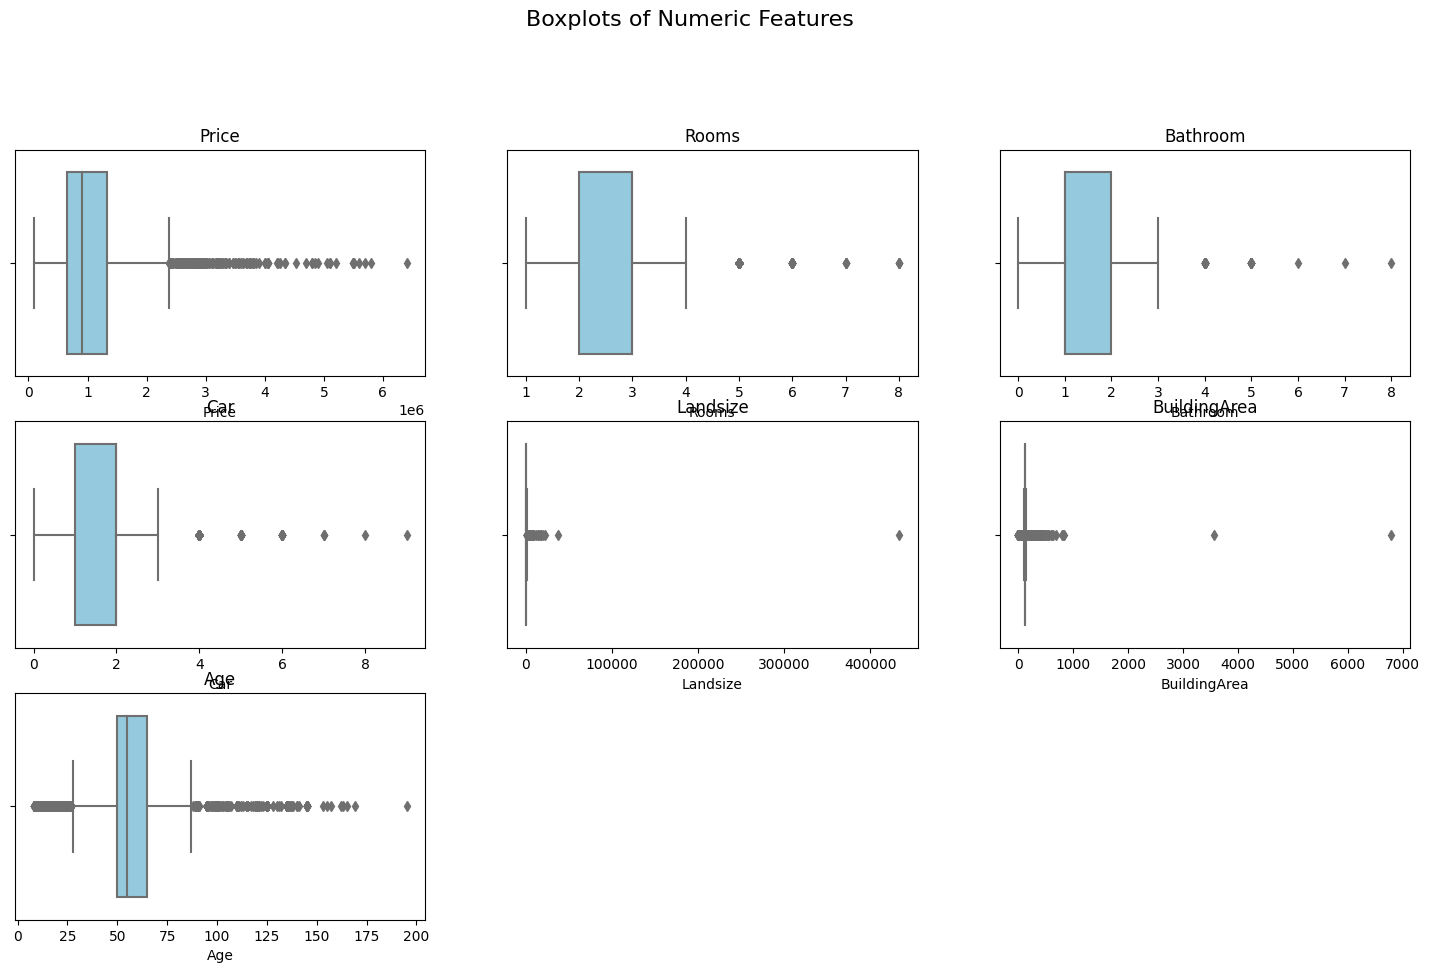

In [17]:
numeric_cols = ['Price', 'Rooms', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'Age']
n_cols = 3
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols
sns.set_palette("Pastel1")
plt.figure(figsize=(18, 10)) 
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f'{col}', fontsize=12)
    #plt.tight_layout()
plt.suptitle('Boxplots of Numeric Features', fontsize=16, y=1.02)
plt.show()

In [18]:
#handle ouliers
df['LogPrice'] = np.log1p(df['Price'])
df['LogLandsize'] = np.log1p(df['Landsize'])
df['LogBuildingArea'] = np.log1p(df['BuildingArea'])

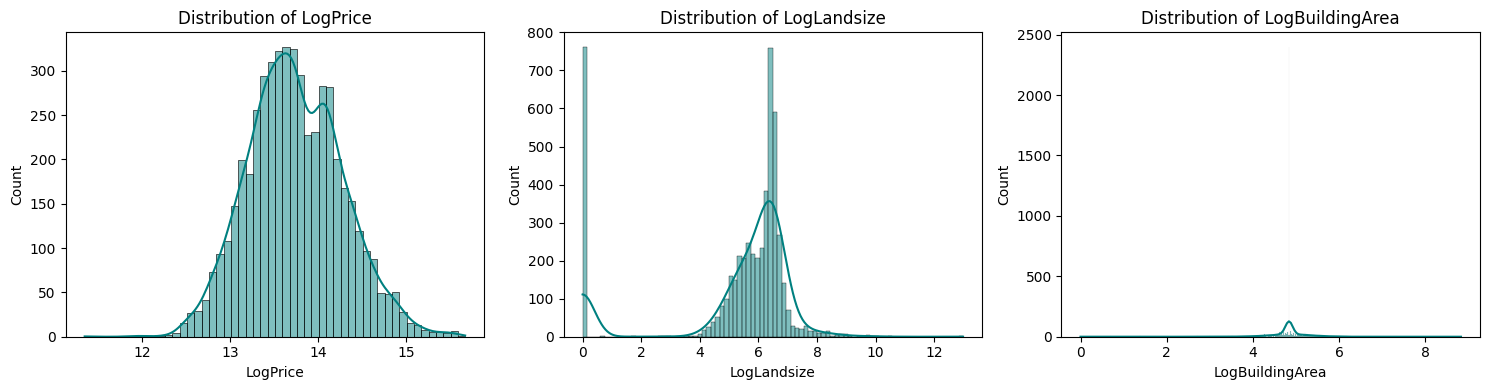

In [19]:
log_cols = ['LogPrice', 'LogLandsize', 'LogBuildingArea']
plt.figure(figsize=(15, 4))
for i, col in enumerate(log_cols, 1):
    plt.subplot(1, 3, i)
    sns.histplot(df[col], kde=True, color='teal')
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

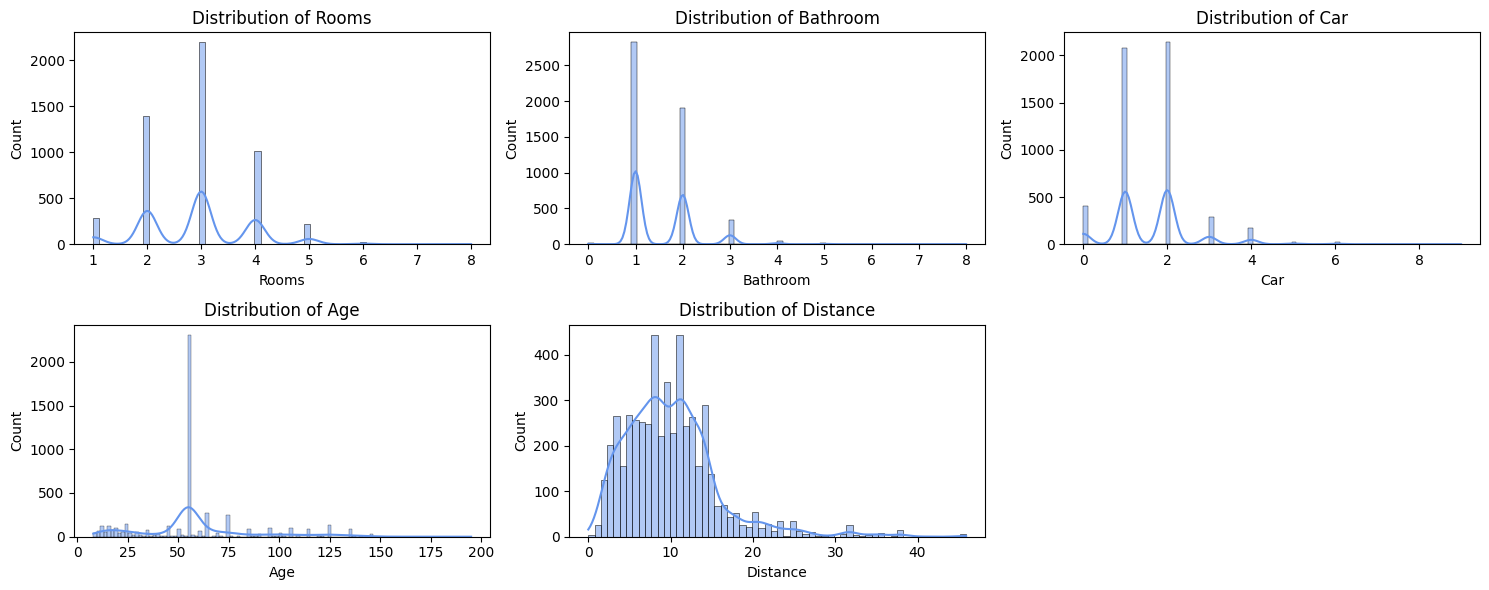

In [20]:
num_cols = ['Rooms', 'Bathroom', 'Car', 'Age', 'Distance']
plt.figure(figsize=(15, 6))

for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], kde=True, color='cornflowerblue')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

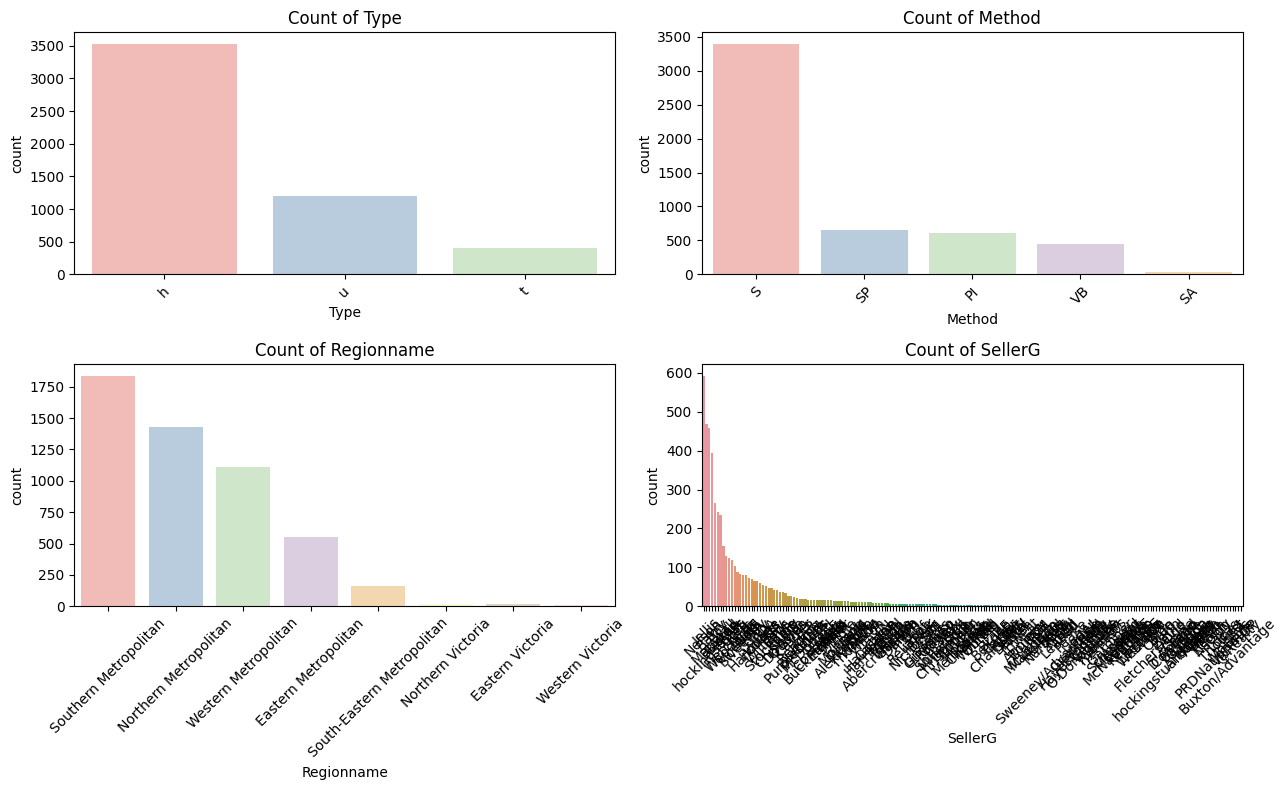

In [21]:
cat_cols = ['Type', 'Method', 'Regionname', 'SellerG']
plt.figure(figsize=(13, 8))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(2, 2, i)
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Count of {col}', fontsize=12)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

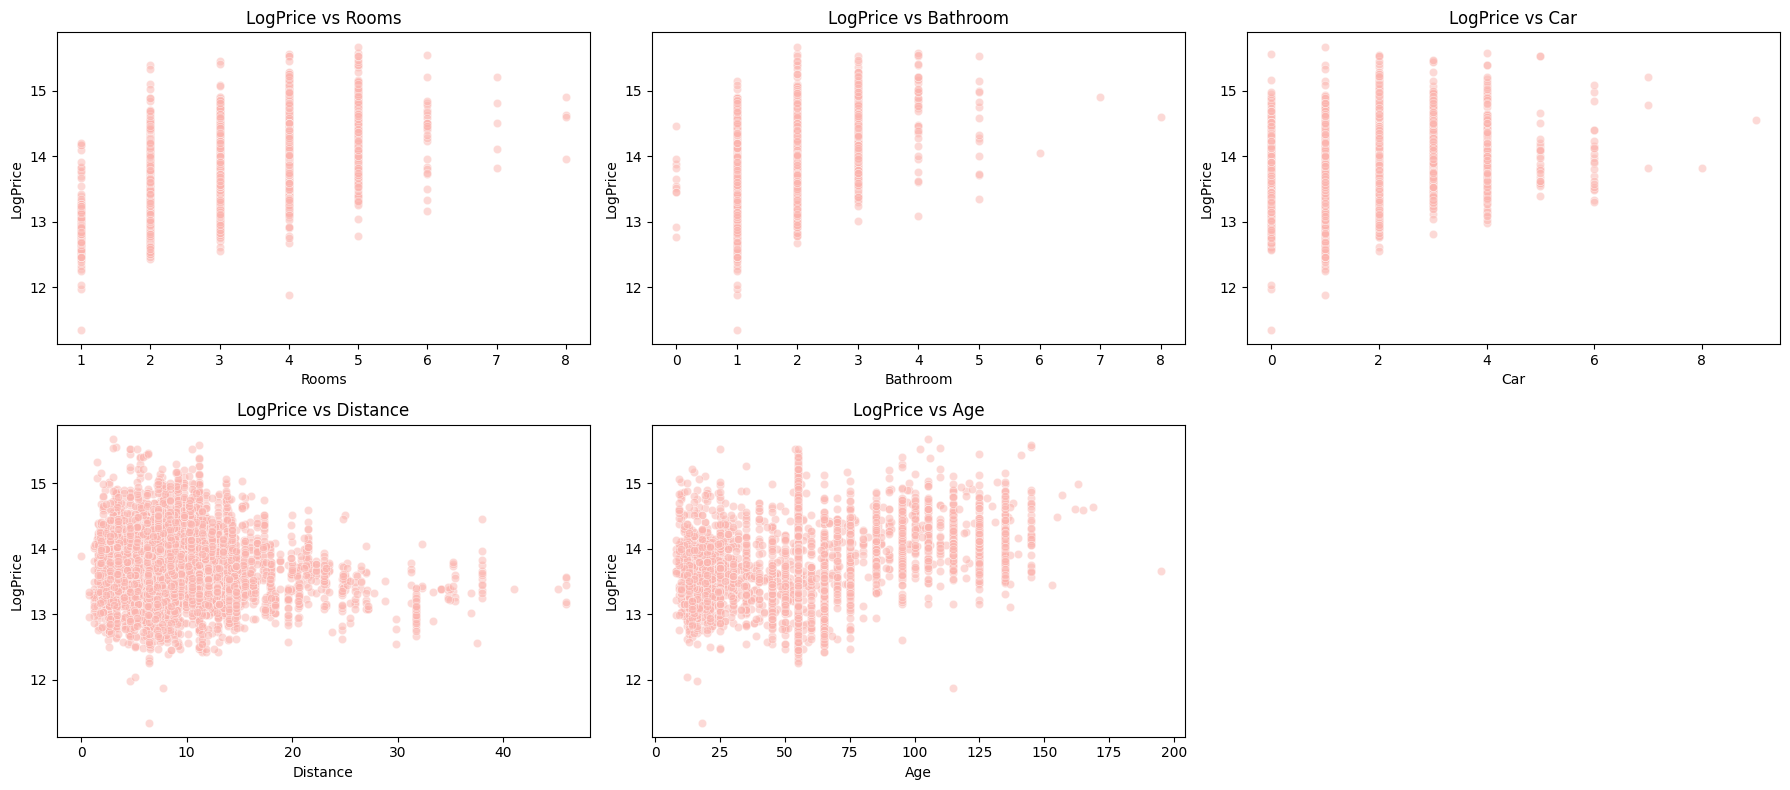

In [22]:
num_cols = ['Rooms', 'Bathroom', 'Car', 'Distance', 'Age']
plt.figure(figsize=(18, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(data=df, x=col, y='LogPrice', alpha=0.5)
    plt.title(f'LogPrice vs {col}', fontsize=12)
plt.tight_layout()
plt.show()

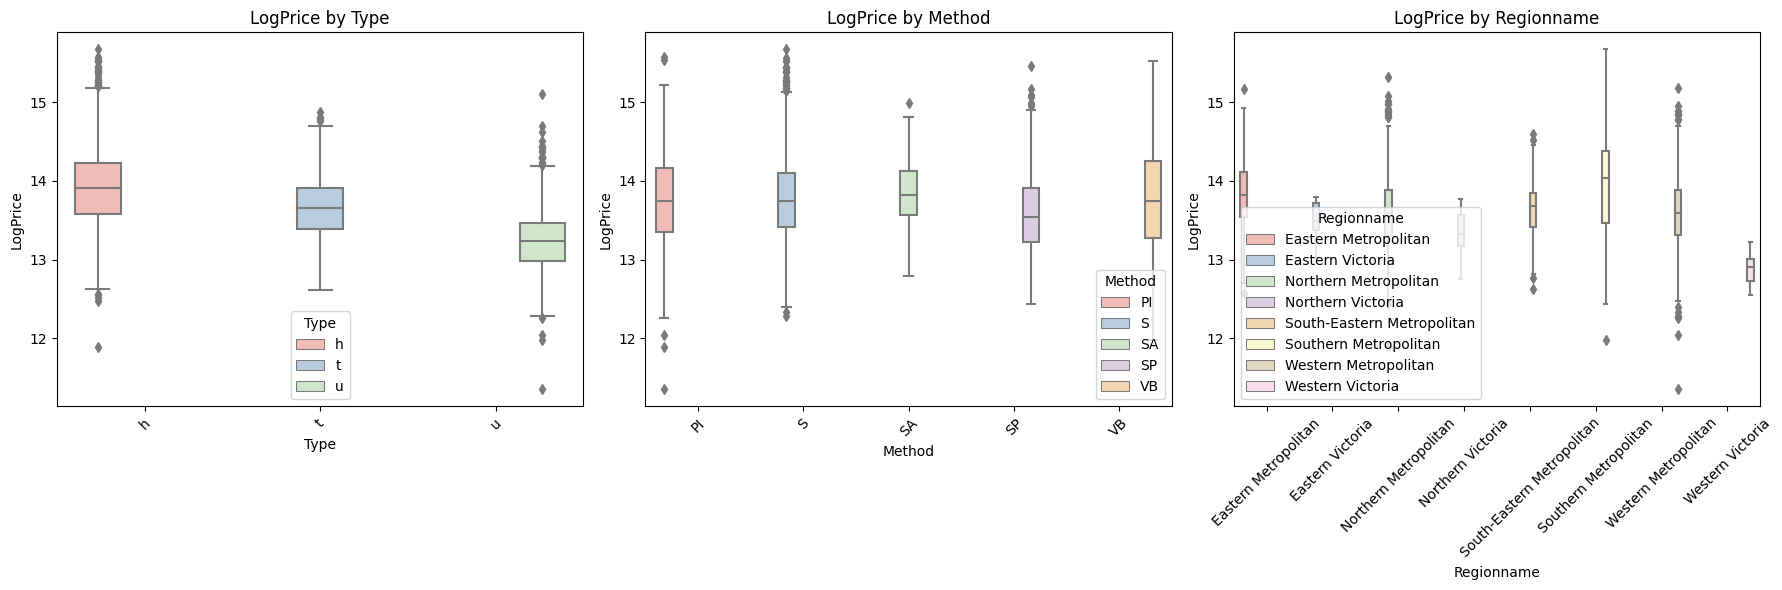

In [23]:
cat_cols = ['Type', 'Method', 'Regionname']
plt.figure(figsize=(18, 6))

for i, col in enumerate(cat_cols, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(data=df, x=col, y='LogPrice', hue=col, palette='Pastel1')
    plt.title(f'LogPrice by {col}', fontsize=12)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5138 entries, 0 to 12631
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Suburb           5138 non-null   category      
 1   Address          5138 non-null   object        
 2   Rooms            5138 non-null   int64         
 3   Type             5138 non-null   category      
 4   Price            5138 non-null   float64       
 5   Method           5138 non-null   category      
 6   SellerG          5138 non-null   object        
 7   Date             5138 non-null   datetime64[ns]
 8   Distance         5138 non-null   float64       
 9   Postcode         5138 non-null   float64       
 10  Bedroom2         5138 non-null   float64       
 11  Bathroom         5138 non-null   float64       
 12  Car              5138 non-null   float64       
 13  Landsize         5138 non-null   float64       
 14  BuildingArea     5138 non-null   float64    

In [25]:
df.describe()

,Rooms,Price,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount,Age,LogPrice,LogLandsize,LogBuildingArea
count,5138.000000,5.138000e+03,5138,5138.00000,5138.000000,5138.000000,5138.000000,5138.000000,5138.000000,5138.000000,5138.0,5138.000000,5138.000000,5138.000000,5138.0,5138.000000,5138.000000,5138.000000
mean,2.922149,1.079157e+06,2017-01-07 04:31:00.957571072,10.03081,3106.047489,2.898988,1.541067,1.598093,618.399572,135.851856,1967.0,-37.809112,144.994478,7430.135461,58.0,13.744058,5.196624,4.822936
min,1.000000,8.500000e+04,2016-03-09 00:00:00,0.00000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1830.0,-38.164920,144.431810,249.000000,8.0,11.350418,0.000000,0.000000
25%,2.000000,6.450000e+05,2016-07-11 00:00:00,6.10000,3044.000000,2.000000,1.000000,1.000000,175.250000,120.000000,1960.0,-37.856200,144.929717,4294.000000,50.0,13.377007,5.171900,4.795791
50%,3.000000,9.000000e+05,2017-01-07 00:00:00,9.20000,3087.000000,3.000000,1.000000,2.000000,444.500000,125.000000,1970.0,-37.804200,144.999400,6543.000000,55.0,13.710151,6.099197,4.836282
75%,3.000000,1.337000e+06,2017-08-04 00:00:00,12.80000,3148.000000,3.000000,2.000000,2.000000,656.000000,130.000000,1975.0,-37.756933,145.056183,10175.000000,65.0,14.105940,6.487684,4.875197
max,8.000000,6.400000e+06,2017-12-08 00:00:00,45.90000,3977.000000,20.000000,8.000000,9.000000,433014.000000,6791.000000,2017.0,-37.483810,145.526350,21650.000000,195.0,15.671809,12.978528,8.823501
std,0.968740,6.530169e+05,NaN,5.77975,90.955374,0.994101,0.695915,0.947016,6125.782824,119.519449,28.499473,0.078053,0.102956,4363.880713,28.499473,0.534339,2.281268,0.461355


 ## Feature Engineering

In [26]:
# Total interior space
df['TotalRooms'] = df['Rooms'] + df['Bedroom2'] + df['Bathroom']
# Density of construction
df['Density'] = df['BuildingArea'] / df['Landsize']
df['Density'] = df['Density'].replace([np.inf, -np.inf], np.nan)  # Safe assignment
# Month of sale
df['MonthSold'] = df['Date'].dt.month
# Weekend sale flag
df['WeekendSale']= df['Date'].dt.dayofweek >= 5
df['IsNew'] = df['Age'] < 10

In [27]:
df[['TotalRooms', 'Density', 'MonthSold', 'WeekendSale', 'IsNew']].describe()

,TotalRooms,Density,MonthSold
count,5138.000000,4376.000000,5138.000000
mean,7.362203,0.408187,6.790775
std,2.412613,1.067511,3.406245
min,3.000000,0.000000,1.000000
25%,5.000000,0.190840,3.000000
50%,7.000000,0.279514,7.000000
75%,9.000000,0.500000,10.000000
max,24.000000,62.000000,12.000000


In [28]:
# Select numeric features
num_features = ['Rooms', 'Bathroom', 'Car', 'Distance', 'Age',
                'LogLandsize', 'LogBuildingArea', 'TotalRooms', 'Density']

# Correlation with target
correlations = df[num_features + ['LogPrice']].corr()['LogPrice'].sort_values(ascending=False)
print(correlations)

LogPrice           1.000000
TotalRooms         0.589454
Rooms              0.570774
Bathroom           0.466940
LogBuildingArea    0.407962
LogLandsize        0.369523
Age                0.307993
Car                0.277095
Density           -0.030852
Distance          -0.132339
Name: LogPrice, dtype: float64


In [29]:
df.drop(columns=['Address', 'SellerG', 'Postcode', 'YearBuilt', 'Price'], inplace=True)

In [30]:
df.columns

Index(['Suburb', 'Rooms', 'Type', 'Method', 'Date', 'Distance', 'Bedroom2',
       'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'CouncilArea',
       'Lattitude', 'Longtitude', 'Regionname', 'Propertycount', 'Age',
       'LogPrice', 'LogLandsize', 'LogBuildingArea', 'TotalRooms', 'Density',
       'MonthSold', 'WeekendSale', 'IsNew'],
      dtype='object')

## Encoding & Scaling

In [31]:
df_encoded = pd.get_dummies(df, columns=['Type', 'Method', 'Regionname'], drop_first=True)
print(df_encoded.filter(like='Type_').head())
print(df_encoded.shape)

   Type_t  Type_u
0   False   False
1   False   False
2   False   False
3   False   False
4   False   False
(5138, 35)


In [32]:
# Encode CouncilArea by mean LogPrice
council_means = df_encoded.groupby('CouncilArea')['LogPrice'].mean()
df_encoded['CouncilArea_encoded'] = df_encoded['CouncilArea'].map(council_means)
print(df_encoded[['CouncilArea', 'CouncilArea_encoded']].head())

  CouncilArea  CouncilArea_encoded
0       Yarra             13.80074
1       Yarra             13.80074
2       Yarra             13.80074
3       Yarra             13.80074
4       Yarra             13.80074


In [33]:
# Future-proof groupby for Suburb
suburb_means = df_encoded.groupby('Suburb', observed=True)['LogPrice'].mean()
df_encoded['Suburb_encoded'] = df_encoded['Suburb'].map(suburb_means)
print(df_encoded[['Suburb', 'Suburb_encoded']].head())

       Suburb  Suburb_encoded
0  Abbotsford       13.883569
1  Abbotsford       13.883569
2  Abbotsford       13.883569
3  Abbotsford       13.883569
4  Abbotsford       13.883569


In [34]:
df_encoded.drop(columns=['Suburb', 'CouncilArea'], inplace=True)

In [35]:
print(df_encoded.isnull().sum())

Rooms                                      0
Date                                       0
Distance                                   0
Bedroom2                                   0
Bathroom                                   0
Car                                        0
Landsize                                   0
BuildingArea                               0
Lattitude                                  0
Longtitude                                 0
Propertycount                              0
Age                                        0
LogPrice                                   0
LogLandsize                                0
LogBuildingArea                            0
TotalRooms                                 0
Density                                  762
MonthSold                                  0
WeekendSale                                0
IsNew                                      0
Type_t                                     0
Type_u                                     0
Method_S  

In [36]:
median_density = df_encoded['Density'].median()
df_encoded['Density'] = df_encoded['Density'].fillna(median_density)

In [37]:
print(df_encoded.isnull().sum().sum())

0


In [38]:
print(df_encoded.duplicated().sum())

0


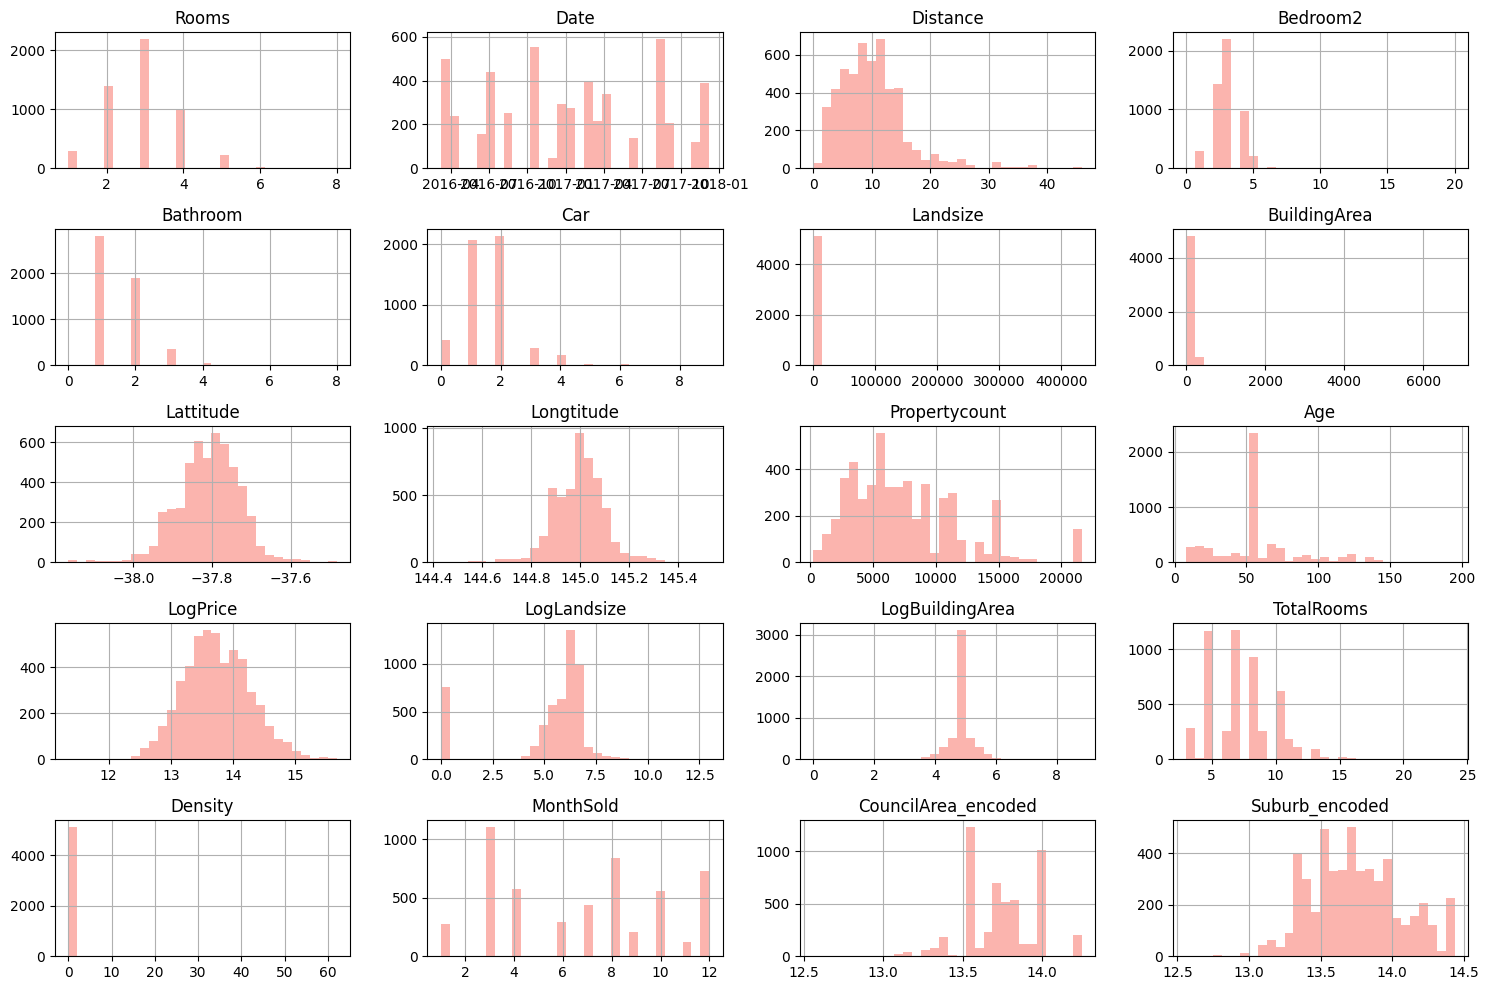

In [39]:
df_encoded.hist(figsize=(15, 10), bins=30)
plt.tight_layout()
plt.show()

In [40]:
df_encoded.drop(columns=['Landsize', 'BuildingArea'], inplace=True)

In [41]:
df_encoded.columns

Index(['Rooms', 'Date', 'Distance', 'Bedroom2', 'Bathroom', 'Car', 'Lattitude',
       'Longtitude', 'Propertycount', 'Age', 'LogPrice', 'LogLandsize',
       'LogBuildingArea', 'TotalRooms', 'Density', 'MonthSold', 'WeekendSale',
       'IsNew', 'Type_t', 'Type_u', 'Method_S', 'Method_SA', 'Method_SP',
       'Method_VB', 'Regionname_Eastern Victoria',
       'Regionname_Northern Metropolitan', 'Regionname_Northern Victoria',
       'Regionname_South-Eastern Metropolitan',
       'Regionname_Southern Metropolitan', 'Regionname_Western Metropolitan',
       'Regionname_Western Victoria', 'CouncilArea_encoded', 'Suburb_encoded'],
      dtype='object')

In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

## Modeling & Evaluation

In [43]:

scaler = StandardScaler()
y = df_encoded['LogPrice']
X = df_encoded.drop(columns=['LogPrice','Date'])

In [44]:
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)

In [45]:


X_train, X_test, y_train, y_test = train_test_split(
    X_scaled_df, y, test_size=0.2, random_state=42
)

### Linear Regression Model

In [46]:

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [47]:

y_pred = lr_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Linear Regression MSE: {mse:.2f}")
print(f"Linear Regression R²: {r2:.2f}")

Linear Regression MSE: 0.07
Linear Regression R²: 0.77


### Random Forest Model

In [48]:

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [49]:
y_pred_rf = rf_model.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest MSE: {mse_rf:.2f}")
print(f"Random Forest R²: {r2_rf:.2f}")

Random Forest MSE: 0.04
Random Forest R²: 0.85


### XGBoost Model

In [50]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost MSE: {mse_xgb:.2f}")
print(f"XGBoost R²: {r2_xgb:.2f}")

XGBoost MSE: 0.04
XGBoost R²: 0.86
